## Predicting Heart Disease using machine learning

This notebook looks into using various Python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart diesase basd on their medical attributes.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data

A version of the data is available here: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we will pursue the project.


## 4. Features

#### Create data dictionary 

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
*cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
* -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute


## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation

In [1]:
# Import all the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear insde our notebook
%matplotlib inline 

# Model Evaluation
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load data

In [3]:
df = pd.read_csv("heart-disease.csv")

## 5. Modelling

In [6]:
# Load your dataset (assuming 'df' is your DataFrame)
X = df.copy()  # Copy dataset since we are not using labels

# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\Aditya\Desktop\heart_disease\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Aditya\Desktop\heart_disease\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Aditya\Desktop\heart_disease\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Aditya\Desktop\heart_disease\env\Lib\site-packages\sklearn\cluster\_kmeans.p

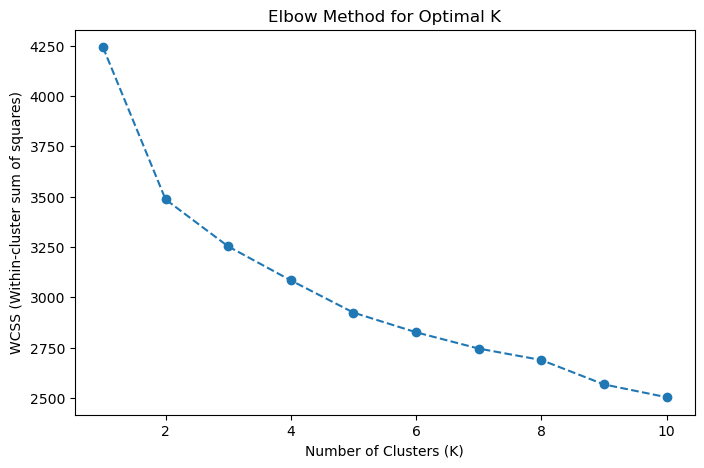

In [21]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
wcss = []  # Within-cluster sum of squares
k_range = range(1, 11)  # Test K values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [18]:
optimal_k = 2 # Found from elbow method shown above
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init="auto")
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)  # Assign clusters to each patient

# Show first few rows
print(df[['KMeans_Cluster']].head())


   KMeans_Cluster
0               0
1               0
2               0
3               0
4               0


C:\Users\Aditya\Desktop\heart_disease\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [22]:
spectral = SpectralClustering(n_clusters=optimal_k, affinity='nearest_neighbors', random_state=42)
df['Spectral_Cluster'] = spectral.fit_predict(X_scaled)

# Show first few rows
print(df[['Spectral_Cluster']].head())


   Spectral_Cluster
0                 1
1                 1
2                 1
3                 1
4                 1


C:\Users\Aditya\Desktop\heart_disease\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


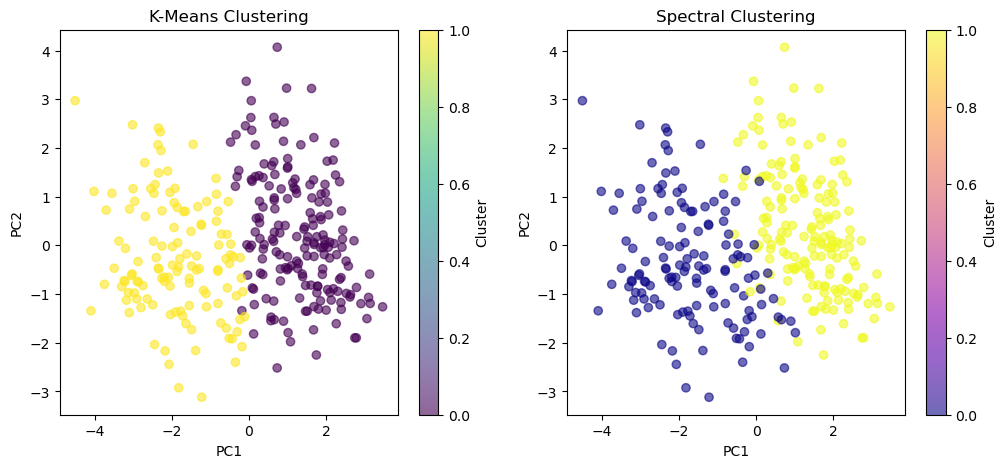

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

# K-Means Visualization
plt.subplot(1,2,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.colorbar(label="Cluster")

# Spectral Clustering Visualization
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Spectral_Cluster'], cmap='plasma', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral Clustering')
plt.colorbar(label="Cluster")

plt.show()
